# An more extensive example on machine learning

BMED360-2021  `02-extensive-example.ipynb`

<a href="https://colab.research.google.com/github/computational-medicine/BMED360-2021/tree/main/Lab2-ML-tissue-classification/02-extensive-example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Learning outcome:

We will build on the experience from the **Iris dataset** and repeat the procedure on another benchmark data set: The **Pima Indians Diabetes Database**. <br>
You'll find a description of the data set together with a link to the data here: https://www.kaggle.com/uciml/pima-indians-diabetes-database. <br>The data set is also available here: https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

The dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, consists of several medical predictor variables and one target variable, Outcome (diabetes=1, or not-diabetes=0). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Ref: Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### For using Colab
**--> (some of) the following libraries must be `pip installed` (i.e. uncommet these among the following pip commands):**

In [1]:
# These might not be necessary to pip install on colab:
#!pip install matplotlib
#!pip install gdown
#!pip install sklearn

**Download zipped data from Google Drive using** [`gdown`](https://github.com/wkentaro/gdown)

In [2]:
import gdown
import shutil
import os
import sys

In [3]:
# Download zip-file if ./assets does not exist (as when running in Colab)

if os.path.isdir('./assets') == False:
    
    ## Download assets.zip for Google Drive        
    # https://drive.google.com/file/d/18lUwfxqtWD6BB9WiQKzzSr6RoBcysSqr/view?usp=sharing       
    file_id = '18lUwfxqtWD6BB9WiQKzzSr6RoBcysSqr'
    url = 'https://drive.google.com/uc?id=%s' % file_id
    output = './assets.zip'
    gdown.download(url, output, quiet=False)
    
    ## Unzip the assets file into `./assets`
    shutil.unpack_archive(output, '.')
    
    ## Delete the `assets.zip` file
    os.remove(output)
else:
    print(f'./assets  exists already!')

./assets  exists already!


In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn # scikit-learn for most ML work (except for deep learning)
%matplotlib inline

In [5]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Seaborn version ' + sns.__version__)
print('Scikit-learn version ' + sklearn.__version__)

Python version 3.8.0 | packaged by conda-forge | (default, Nov 22 2019, 19:11:19) 
[Clang 9.0.0 (tags/RELEASE_900/final)]
Pandas version 1.2.4
Numpy version 1.19.5
Matplotlib version 3.4.1
Seaborn version 0.11.1
Scikit-learn version 0.24.1


In [6]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

### Load, explore and prepare the data

We download the data (from: https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv) using `urllib`, and store the file in the directory `./data`

In [7]:
import urllib.request

In [8]:
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

In [9]:
# Create directory (if not allreday created) to store data
import os
if not os.path.exists('data'):
    os.makedirs('data')

In [10]:
urllib.request.urlretrieve(url, 'data/diabetes.csv')

('data/diabetes.csv', <http.client.HTTPMessage at 0x7f976b516bb0>)

**As usual, we use Pandas to inspect and process tabular data (text or numerical):**

In [11]:
diabetes = pd.read_csv('data/diabetes.csv')

In [12]:
diabetes

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Some observations:
- It's all numbers, and all the samples contain values for all the features (there are 768 non-NaN values). 
- We notice that there are eight feature columns ($X$) and one target ($y$) column, i.e. diabetes or not.

More information about the data can be found using `describe` and `info`:

Here's a description of each feature (from <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a>):
- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0=Not diabetes, or 1=Diabetes)

In [13]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As before we can visualize the connection between the features in a scatter plot, where each sample is colored by whether it belongs to a diabetic persons or not:

In [15]:
# Specify a colortable list
colors = []
cols = ['blue', 'red']
for i in range(diabetes.shape[0]):
    colors.append(cols[diabetes['diabetes'][i]])  

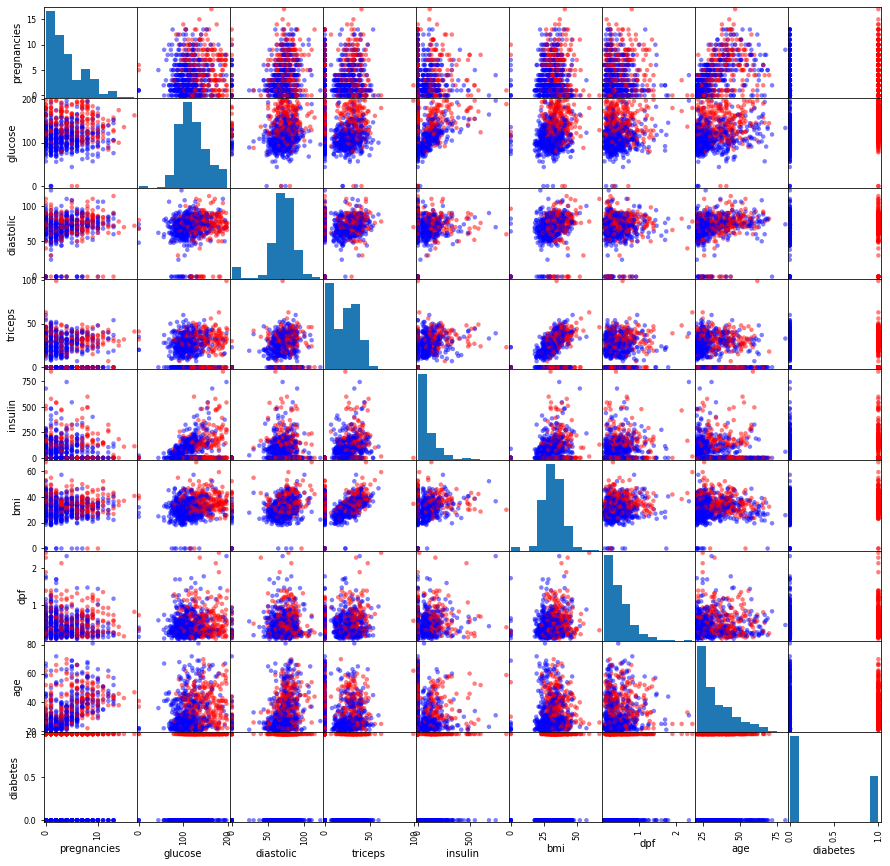

In [16]:
pd.plotting.scatter_matrix(diabetes, c=colors, figsize=(15,15), marker='o', s=20)
plt.show()

We observe that this seems like a tougher problem than the **Iris data**. Still, let's follow the same procedure:

### Select which features to use

... this time we'll use all the features to construct our model. We let $X$ consist of all columns except the target $y$ `diabetes`:

In [17]:
X = diabetes[diabetes.columns[0:-1]]    

In [18]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


The target variable is in the `diabetes` column. `1` means diabetes, `0` not diabetes.

In [19]:
y = diabetes['diabetes']

In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

**Ex 1.4. Get dataframe containing number of subjects with non-diabetes (label=0) and with diabetes (label=1)** <br>
Hint: Return a Series containing counts of unique values.

In [21]:
# %load solutions/ex1_4.py
labels = pd.Index(y)
df = pd.DataFrame(labels.value_counts())
df.columns = ['Number']
df = df.rename_axis(index='Diabetes')
df

,Number
Diabetes,
0,500
1,268


### Training and test data

We split into training and test sets:

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Machine learning model

We will be using the **RandomForest classifier**.
Explained [[here](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)] and [[here](https://machinelearningmastery.com/random-forest-ensemble-in-python)] and [[here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)]

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Train the model -  model fitting

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Test the model on unseen (test) data 

### Assess:  `accuracy`, `precision`, `recall` and `F1-score`  of the prediction (see [wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)).

Accuracy = (TP+TN)/(TP+FP+FN+TN)<br>
Precision = TP/(TP+FP) <br>
Recall = TP/(TP+FN) = Sensitivity = TPR<br>
Specificity = TN/(TN+FP) = TNR <br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision) i.e. the harmonic mean of Precision and Recall, useful when the class distribution is unbalanced<br>
Balanced accuracy = (TPR + TNR)/2

In [27]:
y_pred = rf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

print('Accuracy:', accuracy_score(y_test, y_pred).round(3))
print('Precision:', precision_score(y_test, y_pred).round(3))
print('Recall:', recall_score(y_test, y_pred).round(3))
print('F1 score:', f1_score(y_test, y_pred).round(3))
print('Balanced accuracy:', balanced_accuracy_score(y_test, y_pred).round(3))

Accuracy: 0.734
Precision: 0.625
Recall: 0.652
F1 score: 0.638
Balanced accuracy: 0.716


**With this model and data we are able to predict diabetes with 74% accuracy, and with a sensitivity of 65%**

# Further study of diabetes: understanding the model's predictions

(based on material by Alexander Selvikvåg Lundervold)

An important part of constructing good machine learning models is inspecting what the model has learned. How it weighs the various features when making its decisions in specific cases, how it would react if the features were different in some interesting ways, and so on. This is useful both for improving the models and the input data, and, sometimes, to get a better understanding of the problem the model tries to solve (here's a very interesting example of this [img1](assets/stanford_1.png), [img2](assets/stanford_2.png), from [here](https://www.nature.com/articles/s41746-018-0029-1). This has been discussed also in our ELMED219 course [here](https://github.com/MMIV-ML/ELMED219-2021/tree/main/Lab1-HealthRecords).

For example, what features are the most, and least, important for our diabetes classifier? What's the relation between BMI and diabetes according to our model? 

## Feature importance

When using random forests it's possible to compute how much each feature influenced the predictions. The so-called **feature importance**. We'll learn more about this later. 

In [29]:
importances = rf.feature_importances_

In [30]:
importances

array([0.07449143, 0.27876091, 0.08888318, 0.07157507, 0.07091345,
       0.15805822, 0.11822478, 0.13909297])

In [31]:
# Find index of those with highest importance, sorted from largest to smallest:
indices = np.argsort(importances)[::-1]

In [32]:
for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

glucose: 0.28
bmi: 0.16
age: 0.14
dpf: 0.12
diastolic: 0.09
pregnancies: 0.07
triceps: 0.07
insulin: 0.07


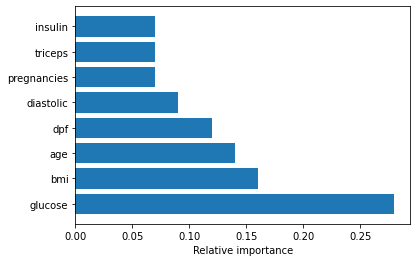

In [33]:
# Plot this
plt.barh(X.columns[indices], np.round(importances[indices],2))
plt.xlabel("Relative importance")
plt.show()

The glucose level has the largest explanatory value, followed by BMI. It's not hard to imagine that this kind of information is very useful in practice! However, it is something that **must be used carefully**, as the feature importances from a single model can be quite misleading. If you have a look at how random forests work, how they are constructed from quite brittle decision trees, you'll understand why this is the case.

## Permutation importance

Feature importances in the random forest classification models of scikit-learn is based on measuring how efficient each feature is in reducing uncertainty (the so-called *impurity* in random forests). Often this results in an incorrect estimate of how important each feature actually is (see https://explained.ai/rf-importance/index.html for a deep-dive into this). 

A more robust technique is what's called [**permutation importance**](https://scikit-learn.org/stable/modules/permutation_importance.html). 

In short:

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. **_The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled_** [[Breiman 2001]( https://doi.org/10.1023/A:1010933404324)]. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

Hence, the idea is that if a feature is important for the predictions of a trained model then a random shuffling of the data in the corresponding column should drastically reduce the accuracy of the model. On the other hand, a random shuffling of an unimportant feature shouldn't impact the model much. 

The `eli5` library has an implementation of this idea, compatible with scikit-learn models:<br>
(_ELI5 is short for "Explain Like I'm 5," a request for a simple explanation to a complicated question or problem_)

In [34]:
import eli5
from eli5.sklearn import PermutationImportance

In [35]:
perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)

In [36]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1031 ± 0.0576,glucose
0.0187 ± 0.0083,bmi
0.0104 ± 0.0114,insulin
0.0083 ± 0.0169,dpf
-0.0073 ± 0.0156,triceps
-0.0115 ± 0.0202,pregnancies
-0.0146 ± 0.0305,diastolic
-0.0188 ± 0.0214,age


We observe that `glucose` is the most important feature by far. If you shuffle `glucose` the model accuracy decreases by more than 10 percentage points. The four features that had negative weights were useless for the predictions: in fact, if you shuffle these at random you will sometimes obtain slightly *better* accuracy!

## Partial dependence plots (PDP)

PDP is another useful way to understand and explain predictions made by machine learning algorithms.

When using black box machine learning algorithms like random forest and boosting, it is hard to understand the relations between predictors and model outcome. For example, in terms of random forest, all we get is the feature importance. Although we can know which feature is significantly influencing the outcome based on the importance calculation, it really sucks that we don’t know in which direction it is influencing. And in most of the real cases, the effect is _non-monotonic_. We need some powerful tools to help understanding the complex relations between predictors and model prediction.

The idea is to plot predictions while increasing a specified feature. For example, what happens to the predicted probability for diabetes as the glucose level increases? As this is an important feature we expect it to change quite a bit (in fact, since we're talking about diabetes we expect the probability to increase). And what about unimportant features like age? 

We can use the PDPbox library, which is compatible with scikit-learn (see https://pdpbox.readthedocs.io/en/latest for details):

In [37]:
from pdpbox import pdp

In [38]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='glucose')

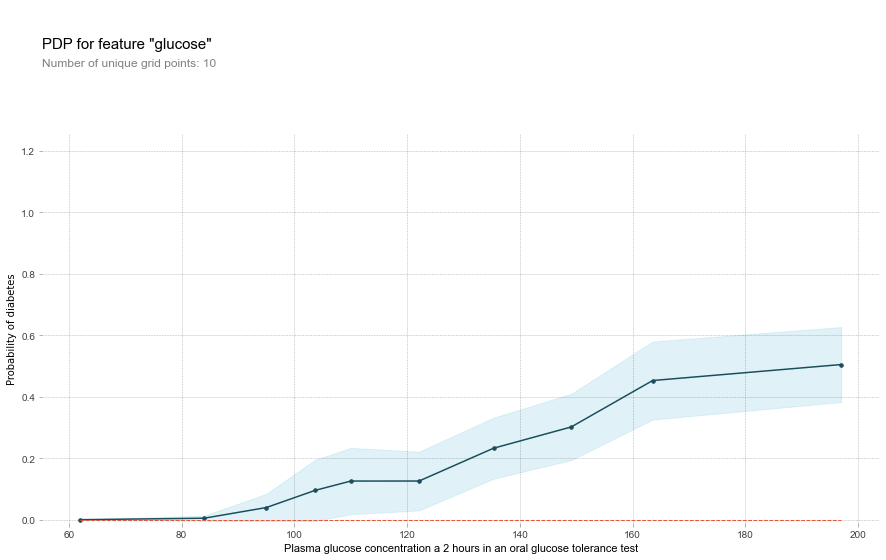

In [39]:
pdp.pdp_plot(pdp_goals, 'glucose')
plt.xlabel('Plasma glucose concentration a 2 hours in an oral glucose tolerance test')
plt.ylabel('Probability of diabetes')
plt.show()

We see that as the glucose level increases the predicted probability for diabetes increases. 

**What about BMI**?

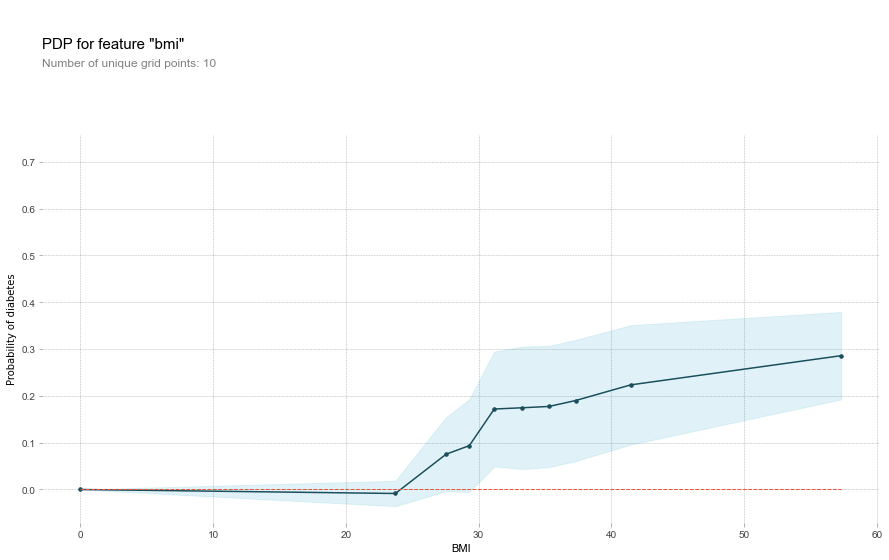

In [40]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='bmi')
pdp.pdp_plot(pdp_goals, 'bmi')
plt.xlabel('BMI')
plt.ylabel('Probability of diabetes')
plt.show()

Same for BMI. The plot for age demonstrates why this feature is deemed unimportant: the probability increases a bit at the beginning (low ages), but then it actually decreases. 

**... and age**?

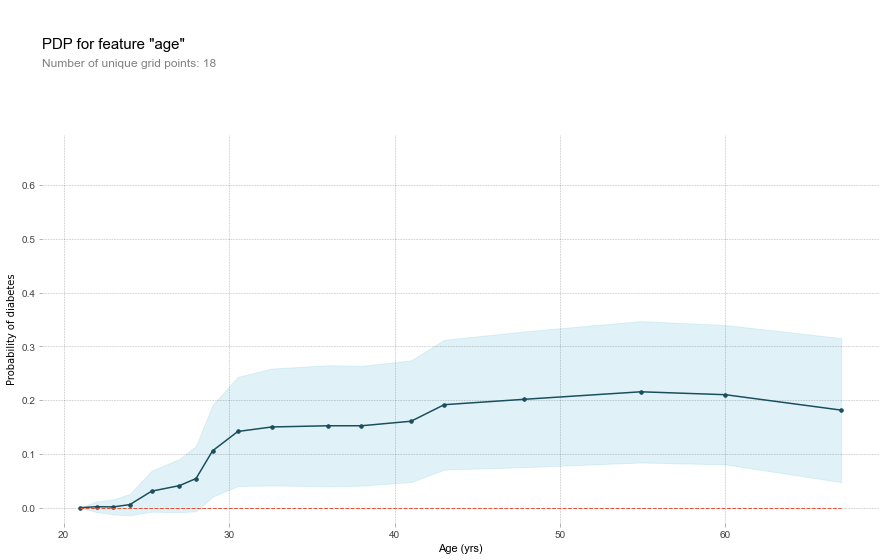

In [41]:
pdp_goals = pdp.pdp_isolate(model=rf, 
                            dataset=X_test, 
                            model_features=X_test.columns.tolist(),
                            num_grid_points=20,
                            feature='age')
pdp.pdp_plot(pdp_goals, 'age')
plt.xlabel('Age (yrs)')
plt.ylabel('Probability of diabetes')
plt.show()

### Two-dimensional PDP

Typically it's the interaction among several features that influences model predictions, not each feature independently. By plotting two-dimensional interaction plots one can get a better understanding of how the features influence the predictions:

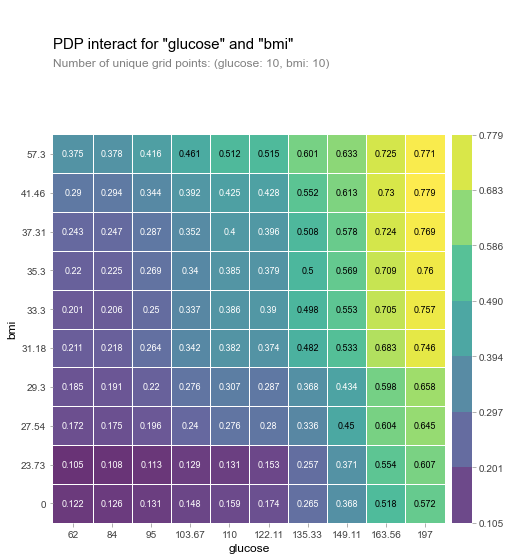

In [42]:
features = ['glucose', 'bmi']
interact  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()

> **NOTE:** Of course, all these conclusions depend on the exact data set that we have used. To make any real inferences about diabets and its relation to glucose level, BMI, age etc one would need a carefully designed (and large) data set. 

<span style="font-size:200%; color:blue">Machine learning models are rather generic!</span>

> **NOTE!** We applied machine learning to the diabetes-data in the very same way as to the Iris-data!

**This is our code for Iris:**

In [43]:
# Load the data
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model 
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

**This is our code for Diabetes:**

In [44]:
# Load the data
diabetes = pd.read_csv('data/diabetes.csv')
X = diabetes[diabetes.columns[0:-1]] 
y = diabetes['diabetes']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model 
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.734375

**The only difference is that we changed the data!** (the $X$ and the $y$)

# Exercises for further learning

> **Your turn!**
- Construct another random forest by changing the `random_state`. What happens to the accuracy? What happens to the feature imporances?
- Try to create a better random forest by tuning the parameters. If you want to dive deep, use `grid_search` (http://scikit-learn.org/stable/modules/grid_search.html) to automatically find good parameters. 
- Try another classification model. 
- **Extra challenge**: Here's another well-prepared data set: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Download it and repeat the procedure above. This time the goal is to predict the country of origin of a car given various features. 